# Nuages de mots

## Imports et stopwords

In [6]:
from collections import Counter
from wordcloud import WordCloud
import os
import nltk
nltk.download('stopwords')
from nltk.corpus import stopwords
from IPython.display import Image

[nltk_data] Downloading package stopwords to
[nltk_data]     /Users/anoukchapuis/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [7]:
# Stopwords (Idem que dans s1)
sw = stopwords.words("french")
sw += ["les", "plus", "cette", "fait", "faire", "être", "deux", "comme", "dont", "tout",
       "ils", "bien", "sans", "peut", "tous", "après", "ainsi", "donc", "cet", "sous",
       "celle", "entre", "encore", "toutes", "pendant", "moins", "dire", "cela", "non",
       "faut", "trois", "aussi", "dit", "avoir", "doit", "contre", "depuis", "autres",
       "van", "het", "autre", "jusqu", "ville"]
sw = set(sw)


## Créer un fichier contenant le texte de tous les journaux d'une année donnée

In [8]:
# Choisir une année
year = 1945

In [9]:
# Lister les fichiers de cette année
data_path = '../data'
txt_path = '../data/txt'
txts = [f for f in os.listdir(txt_path) if os.path.isfile(os.path.join(txt_path, f)) and str(year) in f]
txts

['KB_JB838_1945-12-22_03-00004.txt',
 'KB_JB838_1945-04-19_02-00001.txt',
 'KB_JB838_1945-12-30_03-00004.txt',
 'KB_JB838_1945-10-19_01-00003.txt',
 'KB_JB838_1945-10-27_03-00002.txt',
 'KB_JB838_1945-06-28_01-00002.txt',
 'KB_JB838_1945-05-21_01-00003.txt',
 'KB_JB838_1945-06-20_03-00002.txt',
 'KB_JB838_1945-07-14_01-00001.txt',
 'KB_JB838_1945-11-07_01-00004.txt',
 'KB_JB838_1945-07-22_01-00003.txt',
 'KB_JB838_1945-11-17_02-00002.txt',
 'KB_JB838_1945-12-08_01-00001.txt',
 'KB_JB838_1945-06-21_03-00001.txt',
 'KB_JB838_1945-12-09_01-00002.txt',
 'KB_JB838_1945-12-19_02-00004.txt',
 'KB_JB838_1945-12-30_03-00002.txt',
 'KB_JB838_1945-12-14_03-00001.txt',
 'KB_JB838_1945-10-21_03-00003.txt',
 'KB_JB838_1945-07-12_01-00003.txt',
 'KB_JB838_1945-11-16_02-00002.txt',
 'KB_JB838_1945-07-24_01-00002.txt',
 'KB_JB838_1945-07-07_01-00001.txt',
 'KB_JB838_1945-01-13_01-00001.txt',
 'KB_JB838_1945-12-22_02-00004.txt',
 'KB_JB838_1945-08-09_02-00003.txt',
 'KB_JB838_1945-09-27_02-00003.txt',
 

In [10]:
# Stocker le contenu de ces fichiers dans une liste
content_list = []
for txt in txts:
    with open(os.path.join(txt_path, txt), 'r') as f:
        content_list.append(f.read())

In [11]:
# Compter le nombre d'éléments (=fichiers) dans la liste
len(content_list)

100

In [12]:
# Imprimer les 200 premiers caractères du contenu du premier fichier
content_list[0][:200]

"/ LE SOIR SAMEDI 22 DECEMBRE 1945 ACHAT BRILLANTS OB, BUOÙX. ARGENTERIE,- MONNAIES Obtnptotr Général d'Rorlogerte et d’Achat. 203. Bd.-Maurice, Lemnnnler (Midi). 47787V JU» CARBURANT s)£ FUME PAS - N'"

In [13]:
# Ecrire tout le contenu dans un fichier temporaire
temp_path = '../data/tmp'
if not os.path.exists(temp_path):
    os.mkdir(temp_path)
with open(os.path.join(temp_path, f'{year}.txt'), 'w') as f:
    f.write(' '.join(content_list))

In [14]:
# Imprimer le contenu du fichier et constater les "déchets"
with open(os.path.join(temp_path, f'{year}.txt'), 'r') as f:
    before = f.read()

before[:500]

'/ LE SOIR SAMEDI 22 DECEMBRE 1945 ACHAT BRILLANTS OB, BUOÙX. ARGENTERIE,- MONNAIES Obtnptotr Général d\'Rorlogerte et d’Achat. 203. Bd.-Maurice, Lemnnnler (Midi). 47787V JU» CARBURANT s)£ FUME PAS - N\'ENCRASSE PAS ..Concessionnaire : SATURNE, . 4, Tué .de. la Fiancée, \'Bruxelles. 41836 V ACHAT BRILLANT Or, bijoux,\' argenterie, monnaies, A. Bonnet, Passage souterrain, pl» Botter (Nord>47779 HAUSSE sur. l’or, bijoux, brillants, monnaies, atgen- telles, ûsbntres, tableaux. Achat RICARD. "Sb. Tue"Bof'

## Nettoyer le fichier à l'aide d'une fonction de nettoyage

### Créer la fonction de nettoyage (à adapter)

In [15]:
def clean_text(year, folder=None):
    if folder is None:
        input_path = f"{year}.txt"
        output_path = f"{year}_clean.txt"
    else:
        input_path = f"{folder}/{year}.txt"
        output_path = f"{folder}/{year}_clean.txt"
    output = open(output_path, "w", encoding='utf-8')
    with open(input_path, encoding='utf-8') as f:
        text = f.read()
        words = nltk.wordpunct_tokenize(text)
        kept = [w.lower() for w in words if len(w) > 2 and w.isalpha() and w.lower() not in sw]
        kept_string = " ".join(kept)
        output.write(kept_string)
    return f'Output has been written in {output_path}!'

### Appliquer la fonction sur le fichier complet de l'année

In [16]:
clean_text(year, folder=temp_path)

'Output has been written in ../data/tmp/1945_clean.txt!'

In [17]:
# Vérifier le résultat
with open(os.path.join(temp_path, f'{year}_clean.txt'), 'r') as f:
    after = f.read()

after[:500]

'soir samedi decembre achat brillants buoùx argenterie monnaies obtnptotr général rorlogerte achat maurice lemnnnler midi carburant fume encrasse concessionnaire saturne tué fiancée bruxelles achat brillant bijoux argenterie monnaies bonnet passage souterrain botter nord hausse bijoux brillants monnaies atgen telles ûsbntres tableaux achat ricard tue bofanlquë brüxeljes hsm ijl pfucan erux bkiqu acier smeffielo viate wilovj étu prix spéciaux grossistes essayez gaines corsets àni gorge ceintures m'

## Nuage de mots

### Afficher les termes les plus fréquents


In [18]:
frequencies = Counter(after.split())
print(frequencies.most_common(10))

[('rossel', 3629), ('rue', 3316), ('dem', 2627), ('bruxelles', 1918), ('tél', 1731), ('ecr', 1536), ('ecrire', 1215), ('bon', 1035), ('maison', 1013), ('brux', 946)]


### Créer, stocker et afficher le nuage de mots

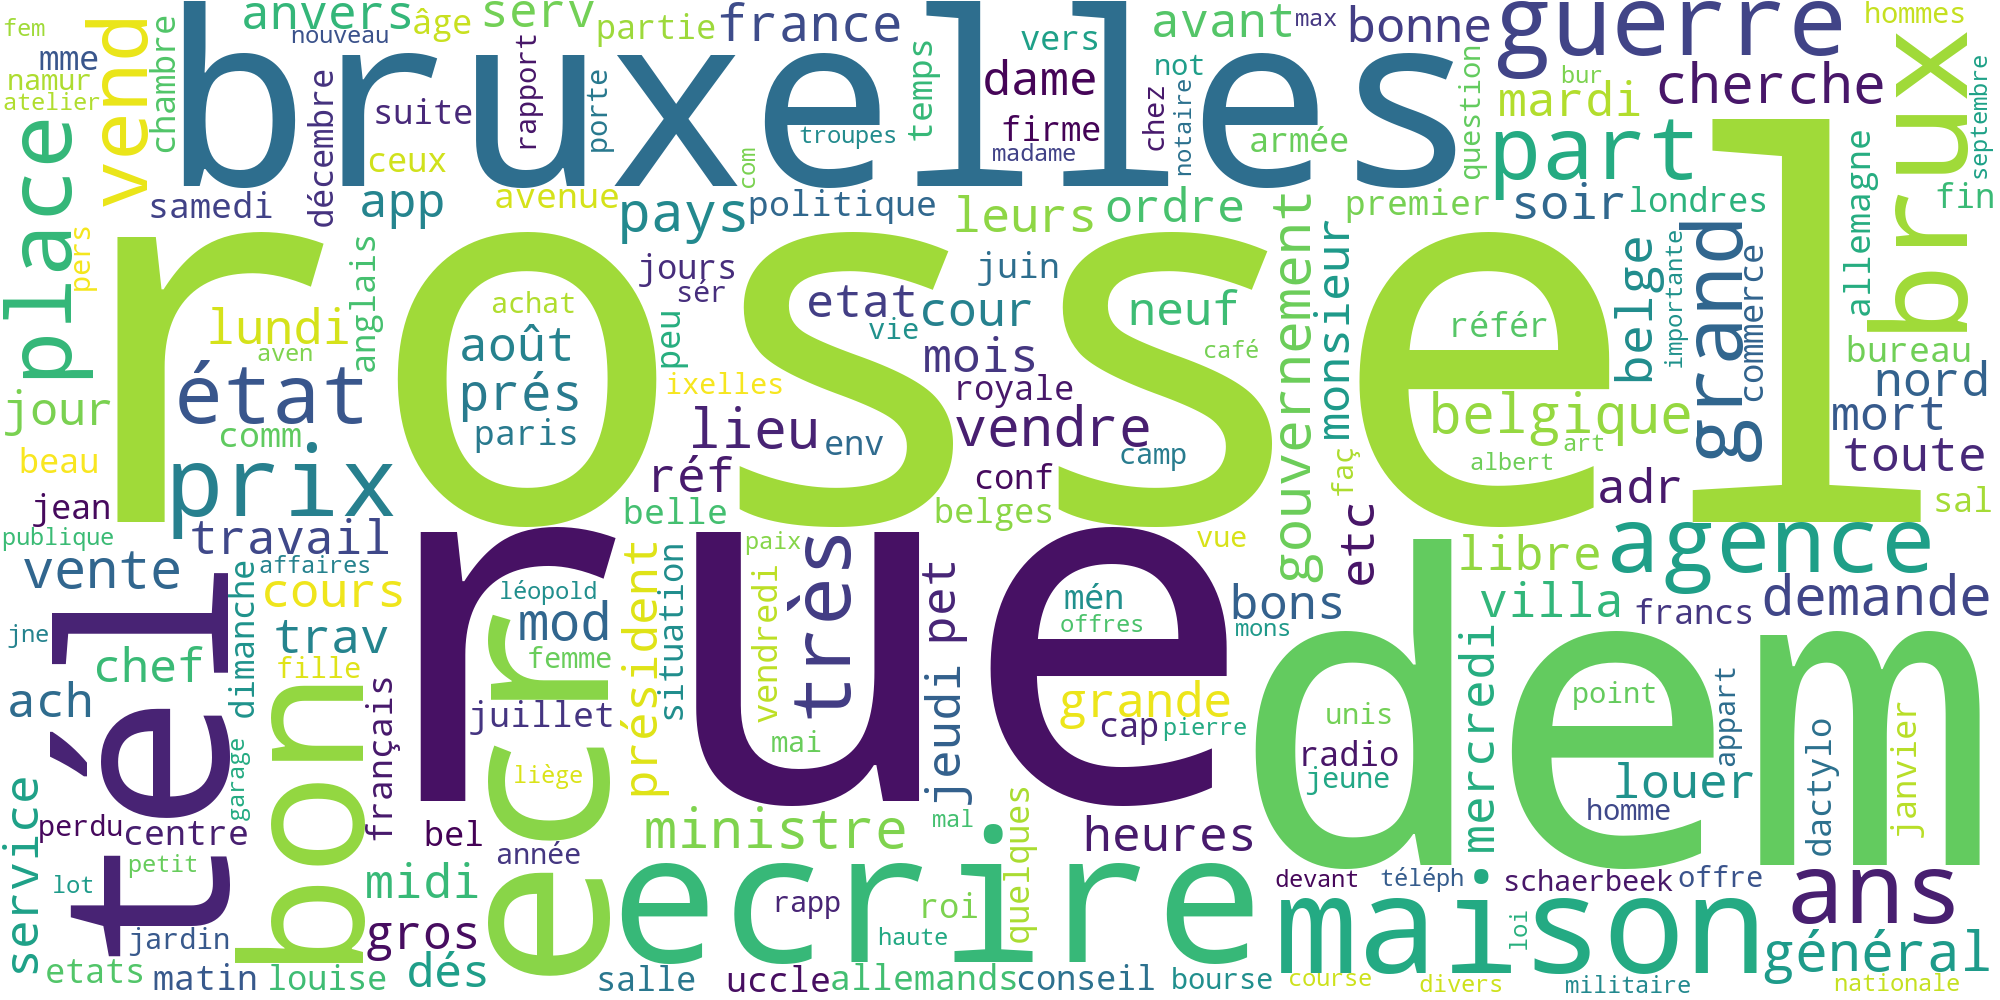

In [19]:
cloud = WordCloud(width=2000, height=1000, background_color='white').generate_from_frequencies(frequencies)
cloud.to_file(os.path.join(temp_path, f"{year}.png"))
Image(filename=os.path.join(temp_path, f"{year}.png"))